In [4]:
##############################
#
# Library Setups
#
##############################


#!pip install pulp
#!pip install pandas
#!pip install xlsxwriter
# Import initial libraries. Not all are needed.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import time
import random
from numpy import linalg as LA
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import scipy
from scipy import optimize as opt
import csv
import os
#!pip install xlrd>=2.0.1
#import pulp

In [5]:
##############################
#
# Import runs and convert to pollutant results
#
##############################




# Load the Excel file
scenarioBaseline_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenarioBaseline\scenarioBaseline_x_variable_values.xlsx'
scenario1_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenario1\scenario1_x_variable_values.xlsx'
scenario2_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenario2\scenario2_x_variable_values.xlsx'
scenario3_file_path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenario3\scenario3_x_variable_values.xlsx'

scenarioBaseline_xls = pd.ExcelFile(scenarioBaseline_file_path)
scenario1_xls = pd.ExcelFile(scenario1_file_path)
scenario2_xls = pd.ExcelFile(scenario2_file_path)
scenario3_xls = pd.ExcelFile(scenario3_file_path)

NOx_coeffs = [0, 0.000383062, 0, 0.002370279, 0.214675997, 0, 0, 0] # ton/MWh
SO2_coeffs = [0, 1.21402E-05, 0, 0.000935558, 0.002477377, 0, 0, 0] # ton/MWh
CO2_coeffs = [0, 2.238202261, 0, 1.457428724, 3.131424223, 0, 0, 0] # ton/MWh
CH4_coeffs = [0, 0.086635868, 0, 1.859068599, 0.112107014, 0, 0, 0] # lb/MWh

# Initialize a dictionary to store sheet totals
scenarioBaseline_NOx_sheet_totals = {}
scenarioBaseline_SO2_sheet_totals = {}
scenarioBaseline_CO2_sheet_totals = {}
scenarioBaseline_CH4_sheet_totals = {}

scenario1_NOx_sheet_totals = {}
scenario1_SO2_sheet_totals = {}
scenario1_CO2_sheet_totals = {}
scenario1_CH4_sheet_totals = {}

scenario2_NOx_sheet_totals = {}
scenario2_SO2_sheet_totals = {}
scenario2_CO2_sheet_totals = {}
scenario2_CH4_sheet_totals = {}

scenario3_NOx_sheet_totals = {}
scenario3_SO2_sheet_totals = {}
scenario3_CO2_sheet_totals = {}
scenario3_CH4_sheet_totals = {}


# Iterate through each sheet
for sheet_name in scenario3_xls.sheet_names:
    # Load each sheet into a DataFrame
    scenarioBaseline_df = pd.read_excel(scenarioBaseline_file_path, sheet_name=sheet_name)
    scenario1_df = pd.read_excel(scenario1_file_path, sheet_name=sheet_name)
    scenario2_df = pd.read_excel(scenario2_file_path, sheet_name=sheet_name)
    scenario3_df = pd.read_excel(scenario3_file_path, sheet_name=sheet_name)

    # Perform element-wise multiplication with the row vector
    scenarioBaseline_NOx_multiplied_df = scenarioBaseline_df * NOx_coeffs
    scenarioBaseline_SO2_multiplied_df = scenarioBaseline_df * SO2_coeffs
    scenarioBaseline_CO2_multiplied_df = scenarioBaseline_df * CO2_coeffs
    scenarioBaseline_CH4_multiplied_df = scenarioBaseline_df * CH4_coeffs

    scenario1_NOx_multiplied_df = scenario1_df * NOx_coeffs
    scenario1_SO2_multiplied_df = scenario1_df * SO2_coeffs
    scenario1_CO2_multiplied_df = scenario1_df * CO2_coeffs
    scenario1_CH4_multiplied_df = scenario1_df * CH4_coeffs

    scenario2_NOx_multiplied_df = scenario2_df * NOx_coeffs
    scenario2_SO2_multiplied_df = scenario2_df * SO2_coeffs
    scenario2_CO2_multiplied_df = scenario2_df * CO2_coeffs
    scenario2_CH4_multiplied_df = scenario2_df * CH4_coeffs

    scenario3_NOx_multiplied_df = scenario3_df * NOx_coeffs
    scenario3_SO2_multiplied_df = scenario3_df * SO2_coeffs
    scenario3_CO2_multiplied_df = scenario3_df * CO2_coeffs
    scenario3_CH4_multiplied_df = scenario3_df * CH4_coeffs

    # Sum the totals on each sheet
    scenarioBaseline_NOx_sheet_total = scenarioBaseline_NOx_multiplied_df.sum().sum()
    scenarioBaseline_NOx_sheet_totals[sheet_name] = scenarioBaseline_NOx_sheet_total
    scenarioBaseline_SO2_sheet_total = scenarioBaseline_SO2_multiplied_df.sum().sum()
    scenarioBaseline_SO2_sheet_totals[sheet_name] = scenarioBaseline_SO2_sheet_total
    scenarioBaseline_CO2_sheet_total = scenarioBaseline_CO2_multiplied_df.sum().sum()
    scenarioBaseline_CO2_sheet_totals[sheet_name] = scenarioBaseline_CO2_sheet_total
    scenarioBaseline_CH4_sheet_total = scenarioBaseline_CH4_multiplied_df.sum().sum()
    scenarioBaseline_CH4_sheet_totals[sheet_name] = scenarioBaseline_CH4_sheet_total

    scenario1_NOx_sheet_total = scenario1_NOx_multiplied_df.sum().sum()
    scenario1_NOx_sheet_totals[sheet_name] = scenario1_NOx_sheet_total
    scenario1_SO2_sheet_total = scenario1_SO2_multiplied_df.sum().sum()
    scenario1_SO2_sheet_totals[sheet_name] = scenario1_SO2_sheet_total
    scenario1_CO2_sheet_total = scenario1_CO2_multiplied_df.sum().sum()
    scenario1_CO2_sheet_totals[sheet_name] = scenario1_CO2_sheet_total
    scenario1_CH4_sheet_total = scenario1_CH4_multiplied_df.sum().sum()
    scenario1_CH4_sheet_totals[sheet_name] = scenario1_CH4_sheet_total

    scenario2_NOx_sheet_total = scenario2_NOx_multiplied_df.sum().sum()
    scenario2_NOx_sheet_totals[sheet_name] = scenario2_NOx_sheet_total
    scenario2_SO2_sheet_total = scenario2_SO2_multiplied_df.sum().sum()
    scenario2_SO2_sheet_totals[sheet_name] = scenario2_SO2_sheet_total
    scenario2_CO2_sheet_total = scenario2_CO2_multiplied_df.sum().sum()
    scenario2_CO2_sheet_totals[sheet_name] = scenario2_CO2_sheet_total
    scenario2_CH4_sheet_total = scenario2_CH4_multiplied_df.sum().sum()
    scenario2_CH4_sheet_totals[sheet_name] = scenario2_CH4_sheet_total

    scenario3_NOx_sheet_total = scenario3_NOx_multiplied_df.sum().sum()
    scenario3_NOx_sheet_totals[sheet_name] = scenario3_NOx_sheet_total
    scenario3_SO2_sheet_total = scenario3_SO2_multiplied_df.sum().sum()
    scenario3_SO2_sheet_totals[sheet_name] = scenario3_SO2_sheet_total
    scenario3_CO2_sheet_total = scenario3_CO2_multiplied_df.sum().sum()
    scenario3_CO2_sheet_totals[sheet_name] = scenario3_CO2_sheet_total
    scenario3_CH4_sheet_total = scenario3_CH4_multiplied_df.sum().sum()
    scenario3_CH4_sheet_totals[sheet_name] = scenario3_CH4_sheet_total



# Convert the dictionary to a DataFrame
scenarioBaseline_NOx_totals_df = pd.DataFrame(list(scenarioBaseline_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenarioBaseline_SO2_totals_df = pd.DataFrame(list(scenarioBaseline_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenarioBaseline_CO2_totals_df = pd.DataFrame(list(scenarioBaseline_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenarioBaseline_CH4_totals_df = pd.DataFrame(list(scenarioBaseline_CH4_sheet_totals.items()), columns=['Year', 'Total'])

scenario1_NOx_totals_df = pd.DataFrame(list(scenario1_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenario1_SO2_totals_df = pd.DataFrame(list(scenario1_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario1_CO2_totals_df = pd.DataFrame(list(scenario1_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario1_CH4_totals_df = pd.DataFrame(list(scenario1_CH4_sheet_totals.items()), columns=['Year', 'Total'])

scenario2_NOx_totals_df = pd.DataFrame(list(scenario2_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenario2_SO2_totals_df = pd.DataFrame(list(scenario2_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario2_CO2_totals_df = pd.DataFrame(list(scenario2_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario2_CH4_totals_df = pd.DataFrame(list(scenario2_CH4_sheet_totals.items()), columns=['Year', 'Total'])

scenario3_NOx_totals_df = pd.DataFrame(list(scenario3_NOx_sheet_totals.items()), columns=['Year', 'Total'])
scenario3_SO2_totals_df = pd.DataFrame(list(scenario3_SO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario3_CO2_totals_df = pd.DataFrame(list(scenario3_CO2_sheet_totals.items()), columns=['Year', 'Total'])
scenario3_CH4_totals_df = pd.DataFrame(list(scenario3_CH4_sheet_totals.items()), columns=['Year', 'Total'])

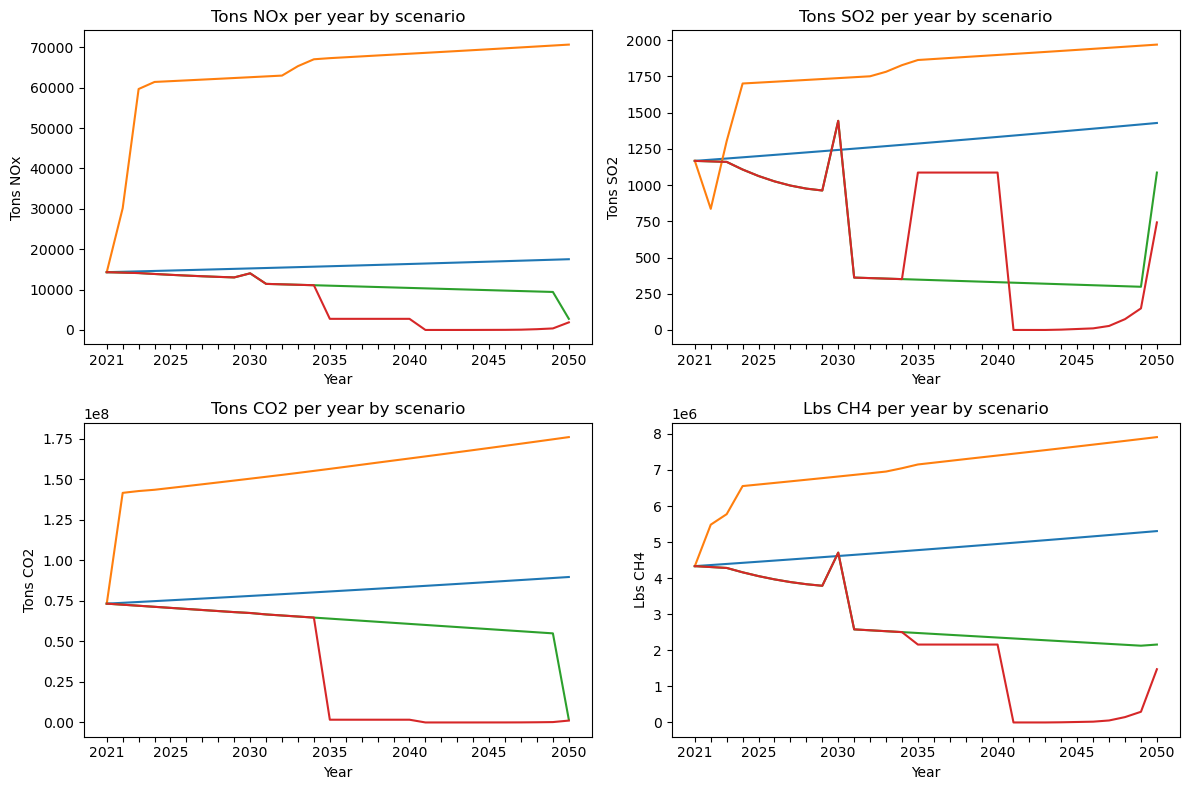

In [172]:
##############################
#
# Plot annual pollutant results
#
##############################



# Create a 2-by-2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, 36)]

#plt.legend(["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc = 'outside upper right')

# NOx plot
axs[0, 0].plot(scenarioBaseline_NOx_totals_df['Year'][:-5], scenarioBaseline_NOx_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[0, 0].plot(scenario1_NOx_totals_df['Year'][:-5], scenario1_NOx_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[0, 0].plot(scenario2_NOx_totals_df['Year'][:-5], scenario2_NOx_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[0, 0].plot(scenario3_NOx_totals_df['Year'][:-5], scenario3_NOx_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[0, 0].set_title('Tons NOx per year by scenario')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Tons NOx')
axs[0, 0].set_xticks(range(0, 30), ticks[:-6])
#axs[0, 0].legend(["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc='upper right', bbox_to_anchor=(-0.5, 1), fontsize = 36)

#, bbox_to_anchor=(1, 1)

# SO2 plot
axs[0, 1].plot(scenarioBaseline_SO2_totals_df['Year'][:-5], scenarioBaseline_SO2_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[0, 1].plot(scenario1_SO2_totals_df['Year'][:-5], scenario1_SO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[0, 1].plot(scenario2_SO2_totals_df['Year'][:-5], scenario2_SO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[0, 1].plot(scenario3_SO2_totals_df['Year'][:-5], scenario3_SO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[0, 1].set_title('Tons SO2 per year by scenario')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Tons SO2')
axs[0, 1].set_xticks(range(0, 30), ticks[:-6])


# CO2 plot
axs[1, 0].plot(scenarioBaseline_CO2_totals_df['Year'][:-5], scenarioBaseline_CO2_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[1, 0].plot(scenario1_CO2_totals_df['Year'][:-5], scenario1_CO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[1, 0].plot(scenario2_CO2_totals_df['Year'][:-5], scenario2_CO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[1, 0].plot(scenario3_CO2_totals_df['Year'][:-5], scenario3_CO2_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[1, 0].set_title('Tons CO2 per year by scenario')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Tons CO2')
axs[1, 0].set_xticks(range(0, 30), ticks[:-6])


# CH4 plot
axs[1, 1].plot(scenarioBaseline_CH4_totals_df['Year'][:-5], scenarioBaseline_CH4_totals_df['Total'][:-5], linestyle='-', label="Baseline")
axs[1, 1].plot(scenario1_CH4_totals_df['Year'][:-5], scenario1_CH4_totals_df['Total'][:-5], linestyle='-', label="Scenario 1")
axs[1, 1].plot(scenario2_CH4_totals_df['Year'][:-5], scenario2_CH4_totals_df['Total'][:-5], linestyle='-', label="Scenario 2")
axs[1, 1].plot(scenario3_CH4_totals_df['Year'][:-5], scenario3_CH4_totals_df['Total'][:-5], linestyle='-', label="Scenario 3")

axs[1, 1].set_title('Lbs CH4 per year by scenario')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Lbs CH4')
axs[1, 1].set_xticks(range(0, 30), ticks[:-6])


plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area without overlapping
plt.show()


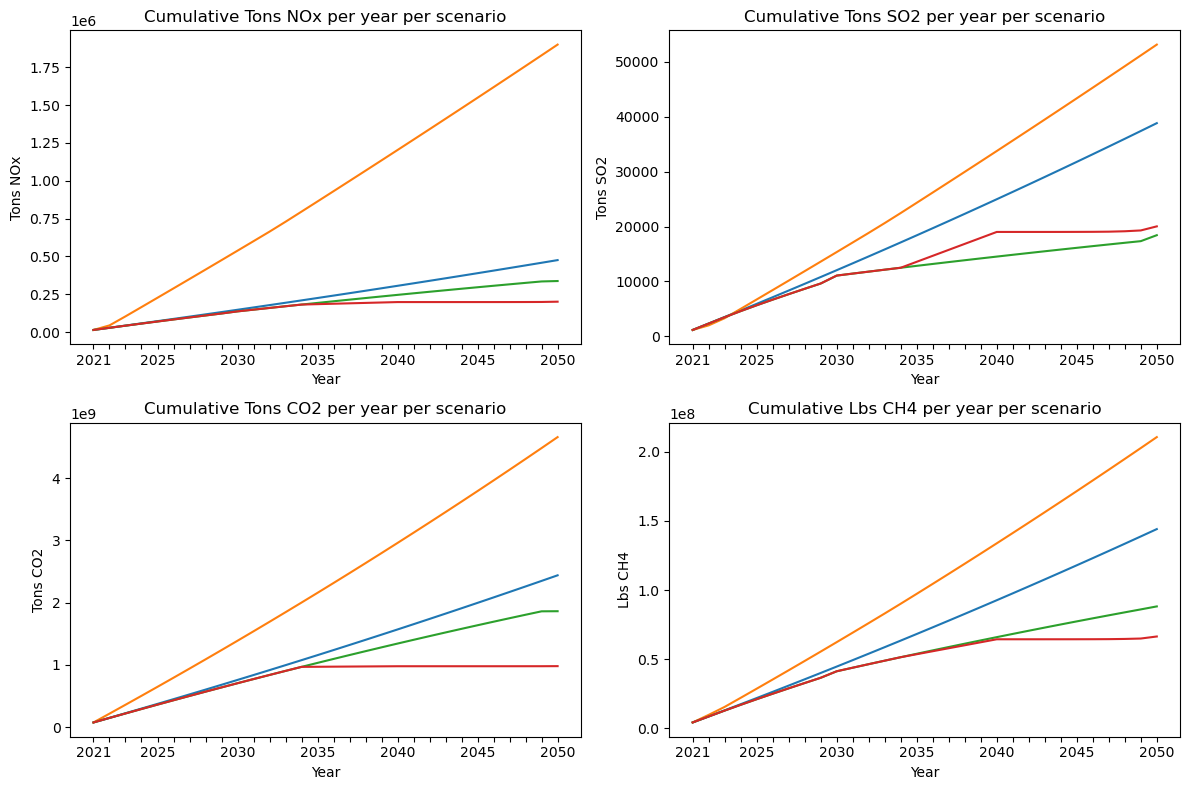

In [145]:
##############################
#
# Plot cumulative pollutant results
#
##############################



# Create a 2-by-2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, 36)]

#plt.legend(["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc = 'outside upper right')

# NOx plot
axs[0, 0].plot(scenarioBaseline_NOx_totals_df['Year'][:-5], scenarioBaseline_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Baseline")
axs[0, 0].plot(scenario1_NOx_totals_df['Year'][:-5], scenario1_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 1")
axs[0, 0].plot(scenario2_NOx_totals_df['Year'][:-5], scenario2_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 2")
axs[0, 0].plot(scenario3_NOx_totals_df['Year'][:-5], scenario3_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 3")

axs[0, 0].set_title('Cumulative Tons NOx per year per scenario')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Tons NOx')
axs[0, 0].set_xticks(range(0, 30), ticks[:-6])
#axs[0, 0].legend(["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc='upper right', bbox_to_anchor=(-0.15, 1))

#, bbox_to_anchor=(1, 1)

# SO2 plot
axs[0, 1].plot(scenarioBaseline_SO2_totals_df['Year'][:-5], scenarioBaseline_SO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Baseline")
axs[0, 1].plot(scenario1_SO2_totals_df['Year'][:-5], scenario1_SO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 1")
axs[0, 1].plot(scenario2_SO2_totals_df['Year'][:-5], scenario2_SO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 2")
axs[0, 1].plot(scenario3_SO2_totals_df['Year'][:-5], scenario3_SO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 3")

axs[0, 1].set_title('Cumulative Tons SO2 per year per scenario')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Tons SO2')
axs[0, 1].set_xticks(range(0, 30), ticks[:-6])


# CO2 plot
axs[1, 0].plot(scenarioBaseline_CO2_totals_df['Year'][:-5], scenarioBaseline_CO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Baseline")
axs[1, 0].plot(scenario1_CO2_totals_df['Year'][:-5], scenario1_CO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 1")
axs[1, 0].plot(scenario2_CO2_totals_df['Year'][:-5], scenario2_CO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 2")
axs[1, 0].plot(scenario3_CO2_totals_df['Year'][:-5], scenario3_CO2_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 3")

axs[1, 0].set_title('Cumulative Tons CO2 per year per scenario')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Tons CO2')
axs[1, 0].set_xticks(range(0, 30), ticks[:-6])


# CH4 plot
axs[1, 1].plot(scenarioBaseline_CH4_totals_df['Year'][:-5], scenarioBaseline_CH4_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Baseline")
axs[1, 1].plot(scenario1_CH4_totals_df['Year'][:-5], scenario1_CH4_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 1")
axs[1, 1].plot(scenario2_CH4_totals_df['Year'][:-5], scenario2_CH4_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 2")
axs[1, 1].plot(scenario3_CH4_totals_df['Year'][:-5], scenario3_CH4_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 3")

axs[1, 1].set_title('Cumulative Lbs CH4 per year per scenario')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Lbs CH4')
axs[1, 1].set_xticks(range(0, 30), ticks[:-6])


plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area without overlapping
plt.show()


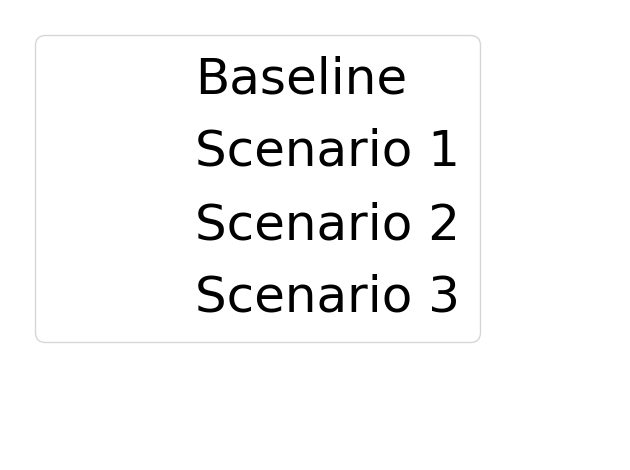

In [166]:
##############################
#
# Plot cumulative pollutant results
#
##############################


# NOx plot
plotBaseline = plt.plot(scenarioBaseline_NOx_totals_df['Year'][:-5], scenarioBaseline_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Baseline", visible = False)
plot1 = plt.plot(scenario1_NOx_totals_df['Year'][:-5], scenario1_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 1", visible = False)
plot2 = plt.plot(scenario2_NOx_totals_df['Year'][:-5], scenario2_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 2", visible = False)
plot3 = plt.plot(scenario3_NOx_totals_df['Year'][:-5], scenario3_NOx_totals_df['Total'][:-5].cumsum(), linestyle='-', label="Scenario 3", visible = False)

plt.axis('off')
plt.legend([plotBaseline[0], plot1[0], plot2[0], plot3[0]], \
           ["Baseline", "Scenario 1", "Scenario 2", "Scenario 3"], loc = 'upper left', fontsize = 36)

plt.tight_layout()  # Adjusts subplot parameters to fit into the figure area without overlapping
plt.show()


In [163]:
plotBaseline[0]

In [ ]:
##############################
#
# Display a subset of pollutant resutls to hand feed into COBRA
#
##############################

for n in range(20,24):
    print(round(scenario3_SO2_totals_df['Total'][n]-212.92), '  ' , round(scenario3_NOx_totals_df['Total'][n]-3862.29))

In [126]:
############################################################
#
# Getting baseline from running NJ with electrical utility SO2 and NOxzeroed out.
#
############################################################


temp_df = pd.read_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\cobra_lower_limit.xls')

lower_limit = pd.DataFrame(index = range(16), columns = [str(0)])
lower_limit['0'][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))
lower_limit['0'][1] = float(temp_df['Unnamed: 3'][2].replace('$', '').replace(',', ''))

mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
mortality_low = float(mortality_interval[0])
mortality_high = float(mortality_interval[1])

nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

lower_limit['0'][2] = mortality_low
lower_limit['0'][3] = mortality_high
lower_limit['0'][4] = nonfatal_heart_attacks_low
lower_limit['0'][5] = nonfatal_heart_attacks_high



for entry_number in range(0,10):
    lower_limit['0'][6+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #print(entry_number, temp_df['Unnamed: 1'][9+entry_number])
#lower_limit

In [134]:
############################################################
#
# Import cobra runs, parse results into usable dataframes
#
############################################################



###########################################################################################

scenario = 'Baseline'

scenarioBaseline_cobra_df = pd.DataFrame(index = range(16), columns = [str(n) for n in range(14)])

for n in range(14):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenarioBaseline_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))
    scenarioBaseline_cobra_df[str(n)][1] = float(temp_df['Unnamed: 3'][2].replace('$', '').replace(',', ''))
    
    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenarioBaseline_cobra_df[str(n)][2] = mortality_low
    scenarioBaseline_cobra_df[str(n)][3] = mortality_high
    scenarioBaseline_cobra_df[str(n)][4] = nonfatal_heart_attacks_low
    scenarioBaseline_cobra_df[str(n)][5] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenarioBaseline_cobra_df[str(n)][6+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenarioBaseline_cobra_array = scenarioBaseline_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenarioBaseline_cobra_array+lower_limit_array
scenarioBaseline_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(14)])
    
diffs = scenarioBaseline_cobra_results_df.diff(axis=1)
    
num_additional_columns = 16
for i in range(num_additional_columns):
    next_column = scenarioBaseline_cobra_results_df.iloc[:, -1] + diffs.iloc[:, -1]  # Calculate the next column by adding the difference to the last column
    scenarioBaseline_cobra_results_df = pd.concat([scenarioBaseline_cobra_results_df, next_column], axis=1)  # Append the next column to the DataFrame

scenarioBaseline_cobra_results_df.columns = [str(n) for n in range(num_additional_columns+14)]
    
    
###########################################################################################  


N = 19
    

###########################################################################################  


    
scenario = '1'

scenario1_cobra_df = pd.DataFrame(index = range(16), columns = [str(n) for n in range(N)])

for n in range(N):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenario1_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))
    scenario1_cobra_df[str(n)][1] = float(temp_df['Unnamed: 3'][2].replace('$', '').replace(',', ''))
    
    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenario1_cobra_df[str(n)][2] = mortality_low
    scenario1_cobra_df[str(n)][3] = mortality_high
    scenario1_cobra_df[str(n)][4] = nonfatal_heart_attacks_low
    scenario1_cobra_df[str(n)][5] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenario1_cobra_df[str(n)][6+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenario1_cobra_array = scenario1_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenario1_cobra_array+lower_limit_array
scenario1_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(N)])


diffs = scenario1_cobra_results_df.diff(axis=1)
    
num_additional_columns = 11
for i in range(num_additional_columns):
    next_column = scenario1_cobra_results_df.iloc[:, -1] + diffs.iloc[:, -1]  # Calculate the next column by adding the difference to the last column
    scenario1_cobra_results_df = pd.concat([scenario1_cobra_results_df, next_column], axis=1)  # Append the next column to the DataFrame

scenario1_cobra_results_df.columns = [str(n) for n in range(num_additional_columns+19)]
    
###########################################################################################



N=30    

scenario = '2'

scenario2_cobra_df = pd.DataFrame(index = range(16), columns = [str(n) for n in range(N)])

for n in range(N):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenario2_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))
    scenario2_cobra_df[str(n)][1] = float(temp_df['Unnamed: 3'][2].replace('$', '').replace(',', ''))
    
    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenario2_cobra_df[str(n)][2] = mortality_low
    scenario2_cobra_df[str(n)][3] = mortality_high
    scenario2_cobra_df[str(n)][4] = nonfatal_heart_attacks_low
    scenario2_cobra_df[str(n)][5] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenario2_cobra_df[str(n)][6+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenario2_cobra_array = scenario2_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenario2_cobra_array+lower_limit_array
scenario2_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(N)])
    
    
     
###########################################################################################
    
    
    
N=30

scenario = '3'

scenario3_cobra_df = pd.DataFrame(index = range(16), columns = [str(n) for n in range(N)])

for n in range(N):

    #########
    book_path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario{scen}_{iter}.xls'.format(scen = scenario, iter = n)
    temp_df = pd.read_excel(book_path)

    scenario3_cobra_df[str(n)][0] = float(temp_df['Unnamed: 1'][2].replace('$', '').replace(',', ''))
    scenario3_cobra_df[str(n)][1] = float(temp_df['Unnamed: 3'][2].replace('$', '').replace(',', ''))
    
    mortality_interval = temp_df['Unnamed: 1'][7].split('/') #
    mortality_low = float(mortality_interval[0])
    mortality_high = float(mortality_interval[1])

    nonfatal_heart_attacks_interval = temp_df['Unnamed: 1'][8].split('/') #
    nonfatal_heart_attacks_low = float(nonfatal_heart_attacks_interval[0])
    nonfatal_heart_attacks_high = float(nonfatal_heart_attacks_interval[1])

    scenario3_cobra_df[str(n)][2] = mortality_low
    scenario3_cobra_df[str(n)][3] = mortality_high
    scenario3_cobra_df[str(n)][4] = nonfatal_heart_attacks_low
    scenario3_cobra_df[str(n)][5] = nonfatal_heart_attacks_high



    for entry_number in range(0,10):
        scenario3_cobra_df[str(n)][6+entry_number] = float(temp_df['Unnamed: 1'][9+entry_number])
    #########
scenario3_cobra_array = scenario3_cobra_df.to_numpy()
lower_limit_array = lower_limit.to_numpy()
test = -scenario3_cobra_array+lower_limit_array
scenario3_cobra_results_df = pd.DataFrame(test, columns = [str(n) for n in range(N)])    

In [142]:
#######################################
#
# Write parsed COBRA results to excel
#
#######################################


scenarioBaseline_cobra_results_df.to_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenarioBaseline_cobra_results.xlsx', index=False, header = False)
scenario1_cobra_results_df.to_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario1_cobra_results.xlsx', index=False, header = False)
scenario2_cobra_results_df.to_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario2_cobra_results.xlsx', index=False, header = False)
scenario3_cobra_results_df.to_excel('C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\scenarios_11_26_23\\cobra_runs\\scenario3_cobra_results.xlsx', index=False, header = False)

In [139]:
scenarioBaseline_cobra_results_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,116267904.00,117100360.00,117915699.00,118737263.00,119558828.00,120409959.00,121243973.00,122101331.00,122941571.00,123811378.00,...,133530223.00,134418706.00,135307189.00,136195672.00,137084155.00,137972638.00,138861121.00,139749604.00,140638087.00,141526570.00
1,262398703.00,264277651.00,266117929.00,267972256.00,269826588.00,271747690.00,273630122.00,275565279.00,277461766.00,279425023.00,...,301361607.00,303367022.00,305372437.00,307377852.00,309383267.00,311388682.00,313394097.00,315399512.00,317404927.00,319410342.00
2,10.45,10.53,10.60,10.67,10.75,10.82,10.90,10.98,11.05,11.13,...,12.00,12.08,12.16,12.24,12.32,12.40,12.48,12.56,12.64,12.72
3,23.65,23.82,23.99,24.16,24.32,24.50,24.67,24.84,25.01,25.19,...,27.17,27.35,27.53,27.71,27.89,28.07,28.25,28.44,28.62,28.80
4,1.25,1.26,1.27,1.28,1.28,1.29,1.30,1.31,1.32,1.33,...,1.44,1.45,1.46,1.47,1.48,1.49,1.50,1.51,1.52,1.53
5,11.62,11.70,11.78,11.87,11.95,12.03,12.12,12.20,12.29,12.37,...,13.35,13.44,13.52,13.61,13.70,13.79,13.88,13.97,14.06,14.15
6,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
7,2.52,2.54,2.55,2.57,2.59,2.61,2.62,2.64,2.66,2.68,...,2.89,2.91,2.93,2.94,2.96,2.98,3.00,3.02,3.04,3.06
8,2.73,2.75,2.76,2.78,2.80,2.82,2.84,2.86,2.88,2.90,...,3.12,3.14,3.16,3.18,3.20,3.22,3.24,3.26,3.28,3.30
9,13.96,14.06,14.16,14.26,14.36,14.46,14.56,14.67,14.77,14.87,...,16.04,16.15,16.25,16.36,16.47,16.57,16.68,16.79,16.90,17.00


In [ ]:
##############################
#
# Ordered list of ailments
#
##############################

'''
Mortality low
--Mortality high
Nonfatal Heart Attacks low
Nonfatal Heart Attacks high
Infant Mortality
Hospital Admits, All Respiratory
--Hospital Admits, Cardiovascular (except heart attacks)
Acute Bronchitis
Upper Respiratory Symptoms
Lower Respiratory Symptoms
--Emergency Room Visits, Asthma
Asthma Exacerbation
Minor Restricted Activity Days
--Work Loss Days
'''

["Mortality high","Hospital Admits, Cardiovascular (except heart attacks)","Emergency Room Visits, Asthma","Work Loss Days"]

In [14]:
##############################
#
# Display a subset of pollutant resutls to hand feed into COBRA
#
##############################

for n in range(20,24):
    print(round(scenario3_SO2_totals_df['Total'][n]-212.92), '  ' , round(scenario3_NOx_totals_df['Total'][n]-3862.29))

-213    -3862
-213    -3862
-213    -3862
-211    -3857


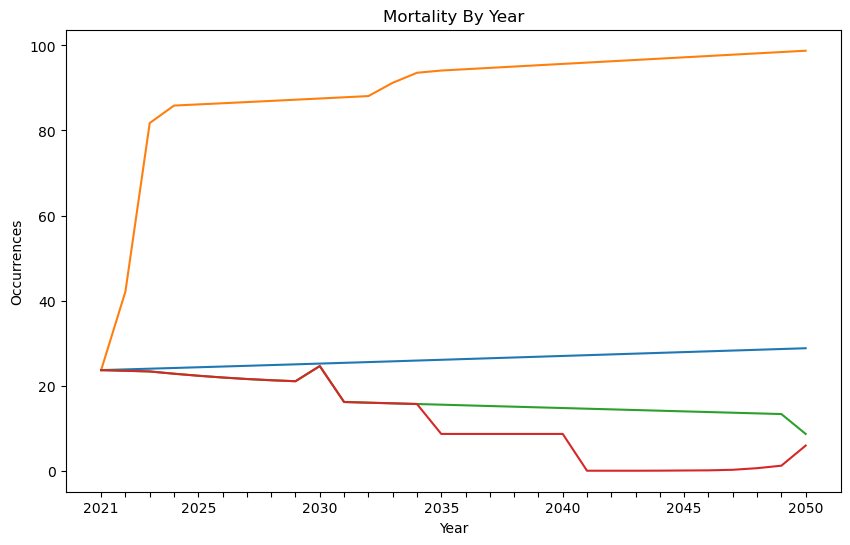

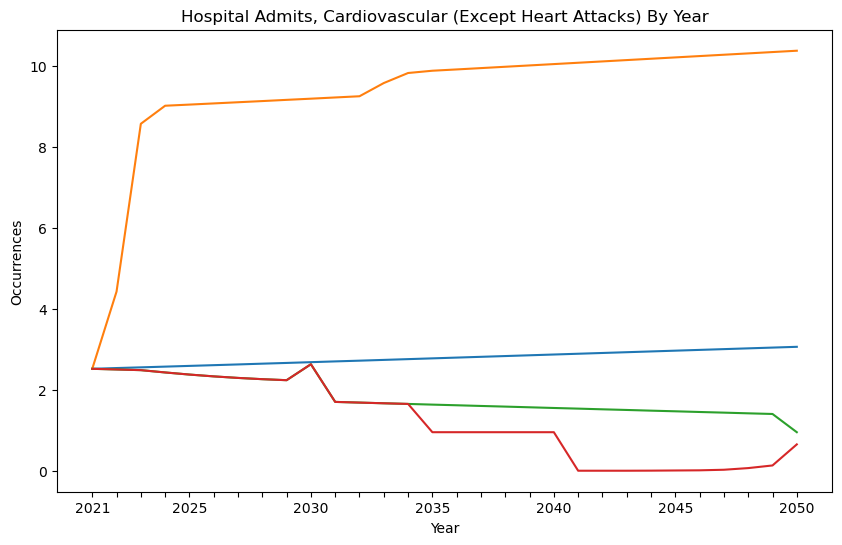

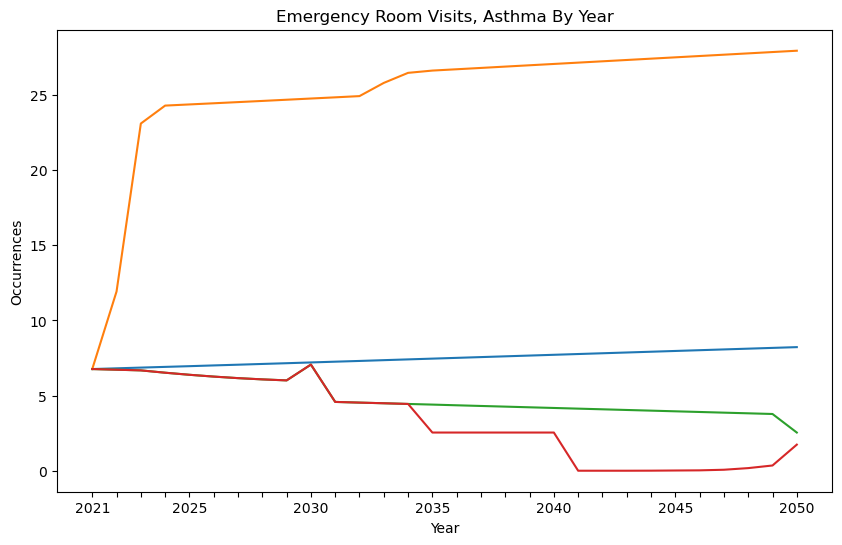

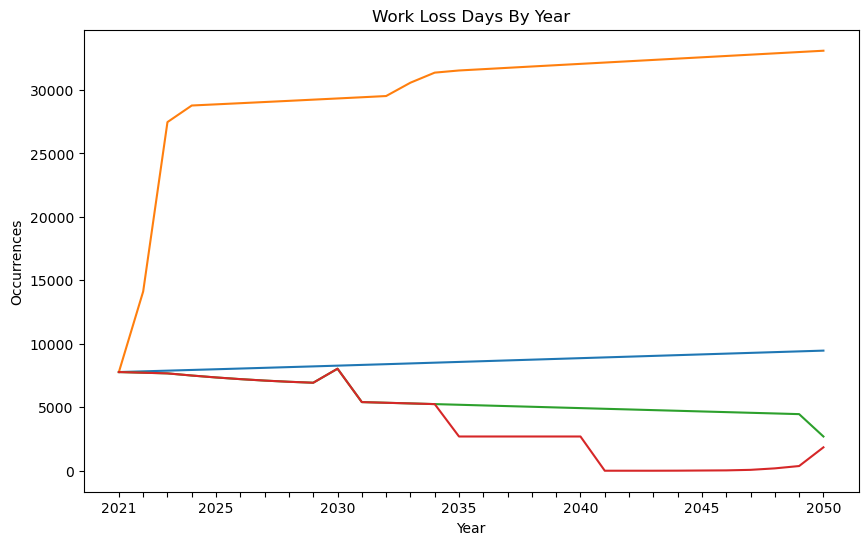

In [136]:
##############################
#
# Plot desired annual health occurances
#
##############################

N = 30
damage_names = ["Mortality","Hospital Admits, Cardiovascular (Except Heart Attacks)","Emergency Room Visits, Asthma","Work Loss Days"]
damage_indices = [3, 7, 12, 14]
counter = 0
for damage_index in damage_indices:
    # Extract the third row data from each DataFrame
    third_row_baseline = scenarioBaseline_cobra_results_df.iloc[damage_index]  # Assuming index 2 represents the third row
    third_row_scenario1 = scenario1_cobra_results_df.iloc[damage_index]
    third_row_scenario2 = scenario2_cobra_results_df.iloc[damage_index]
    third_row_scenario3 = scenario3_cobra_results_df.iloc[damage_index]

    # Plotting the third row data from each DataFrame on the same plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.plot(third_row_baseline, label='Baseline')
    plt.plot(third_row_scenario1, label='Scenario 1')
    plt.plot(third_row_scenario2, label='Scenario 2')
    plt.plot(third_row_scenario3, label='Scenario 3')

    plt.xlabel('Year')  # Customize x-axis label if needed
    plt.ylabel('Occurrences')  # Customize y-axis label if needed
    plt.title('{insertion} By Year'.format(insertion = damage_names[counter]))  # Customize plot title if needed
    
    ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, N)]
    plt.xticks(range(0, N), ticks)
    
    #plt.legend()  # Show legend with DataFrame names

    #plt.grid(True)  # Add grid if needed
    plt.show()
    counter = counter+1

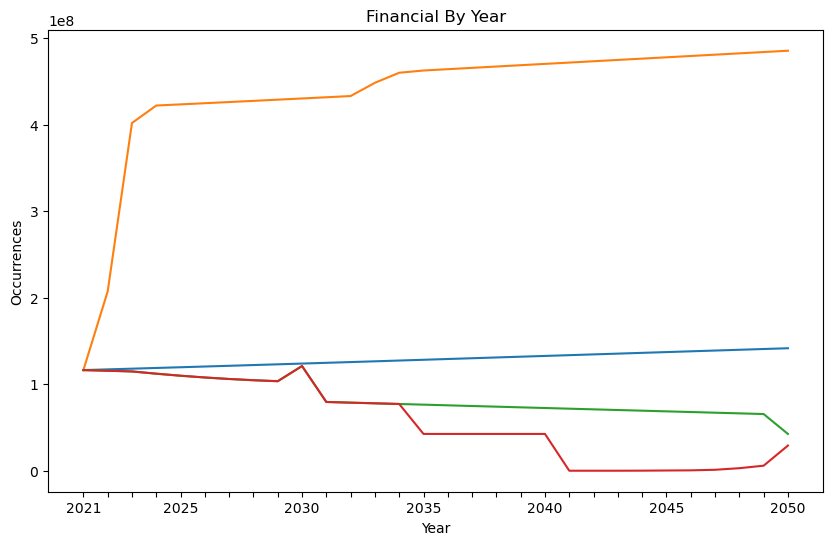

In [16]:
N = 30
damage_names = ["Financial"]
damage_indices = [0]
counter = 0
for damage_index in damage_indices:
    # Extract the third row data from each DataFrame
    third_row_baseline = scenarioBaseline_cobra_results_df.iloc[damage_index]  # Assuming index 2 represents the third row
    third_row_scenario1 = scenario1_cobra_results_df.iloc[damage_index]
    third_row_scenario2 = scenario2_cobra_results_df.iloc[damage_index]
    third_row_scenario3 = scenario3_cobra_results_df.iloc[damage_index]

    # Plotting the third row data from each DataFrame on the same plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.plot(third_row_baseline, label='Baseline')
    plt.plot(third_row_scenario1, label='Scenario 1')
    plt.plot(third_row_scenario2, label='Scenario 2')
    plt.plot(third_row_scenario3, label='Scenario 3')

    plt.xlabel('Year')  # Customize x-axis label if needed
    plt.ylabel('Occurrences')  # Customize y-axis label if needed
    plt.title('{insertion} By Year'.format(insertion = damage_names[counter]))  # Customize plot title if needed
    
    ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, N)]
    plt.xticks(range(0, N), ticks)
    
    #plt.legend()  # Show legend with DataFrame names

    #plt.grid(True)  # Add grid if needed
    plt.show()
    counter = counter+1

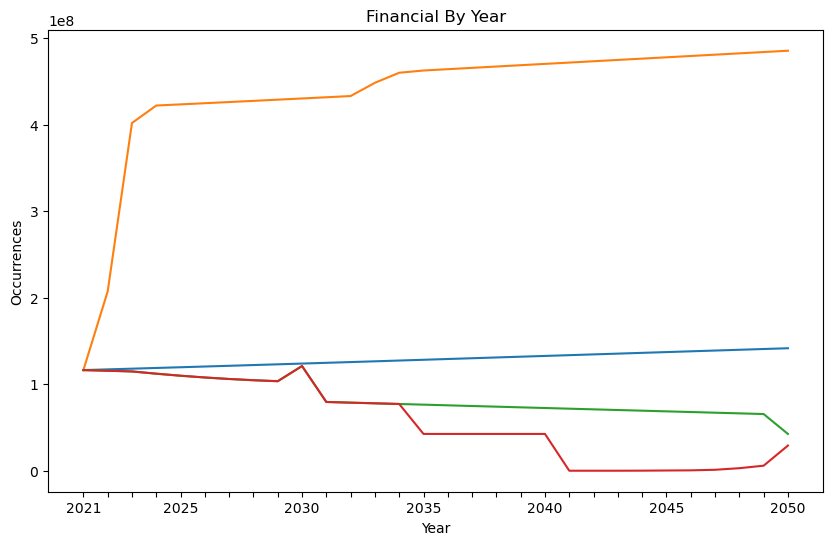

In [18]:
N = 30
damage_names = ["Financial"]

third_row_baseline = scenarioBaseline_cobra_results_df.iloc[0]  # Assuming index 2 represents the third row
third_row_scenario1 = scenario1_cobra_results_df.iloc[0]
third_row_scenario2 = scenario2_cobra_results_df.iloc[0]
third_row_scenario3 = scenario3_cobra_results_df.iloc[0]


plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(third_row_baseline, label='Baseline')
plt.plot(third_row_scenario1, label='Scenario 1')
plt.plot(third_row_scenario2, label='Scenario 2')
plt.plot(third_row_scenario3, label='Scenario 3')

plt.xlabel('Year')  # Customize x-axis label if needed
plt.ylabel('Occurrences')  # Customize y-axis label if needed
plt.title('{insertion} By Year'.format(insertion = damage_names[counter]))  # Customize plot title if needed

ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, N)]
plt.xticks(range(0, N), ticks)

#plt.legend()  # Show legend with DataFrame names

#plt.grid(True)  # Add grid if needed
plt.show()

In [64]:
N = 30
damage_names = ["Financial"]

third_row_baseline = scenarioBaseline_cobra_results_df.iloc[0]  # Assuming index 2 represents the third row
third_row_scenario1 = scenario1_cobra_results_df.iloc[0]
third_row_scenario2 = scenario2_cobra_results_df.iloc[0]
third_row_scenario3 = scenario3_cobra_results_df.iloc[0]
xs = range(0,len(scenario1_cobra_results_df.iloc[0]))


third_row_baseline = third_row_baseline.astype(float).cumsum()
third_row_scenario1 = third_row_scenario1.astype(float).cumsum()
third_row_scenario2 = third_row_scenario2.astype(float).cumsum()
third_row_scenario3 = third_row_scenario3.astype(float).cumsum()


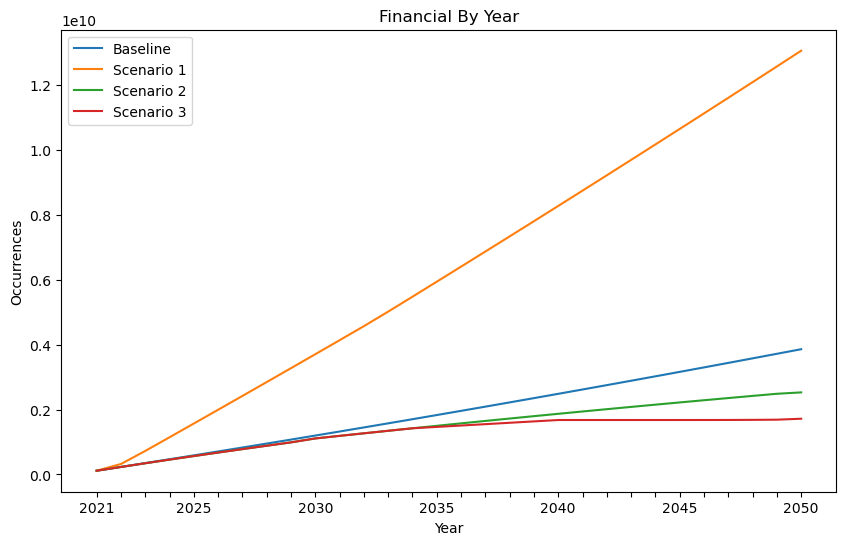

In [70]:
ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, N)]

plt.figure(figsize=(10, 6))
plt.plot(xs, third_row_baseline, label = 'Baseline')
plt.plot(xs, third_row_scenario1, label='Scenario 1')
plt.plot(xs, third_row_scenario2, label='Scenario 2')
plt.plot(xs, third_row_scenario3, label='Scenario 3')


plt.xticks(range(0, N), ticks)


plt.xlabel('Year')  # Customize x-axis label if needed
plt.ylabel('Occurrences')  # Customize y-axis label if needed
plt.title('{insertion} By Year'.format(insertion = damage_names[counter]))  # Customize plot title if needed
plt.legend()
plt.show()

#plt.legend()  # Show legend with DataFrame names

#plt.grid(True)  # Add grid if needed


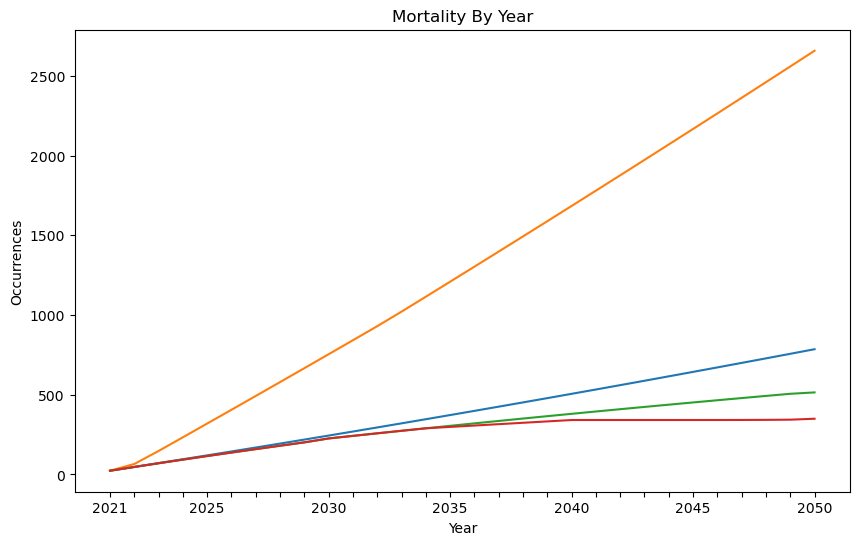

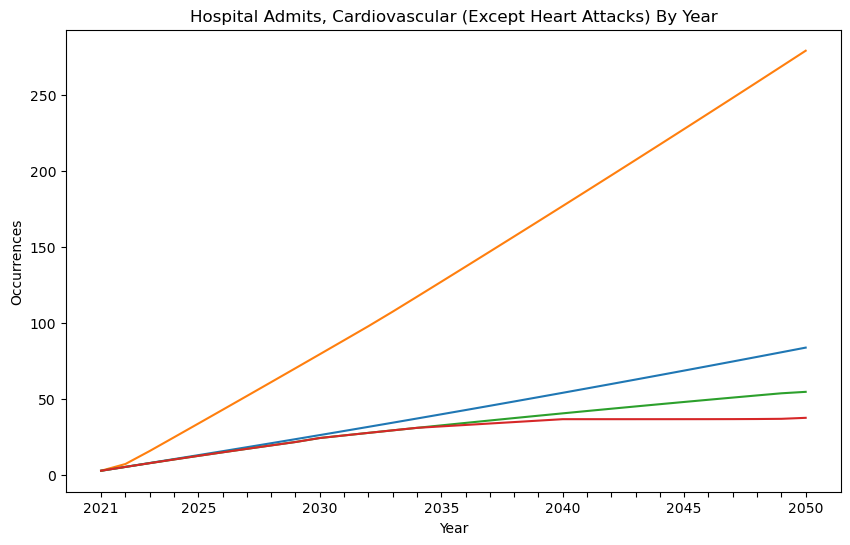

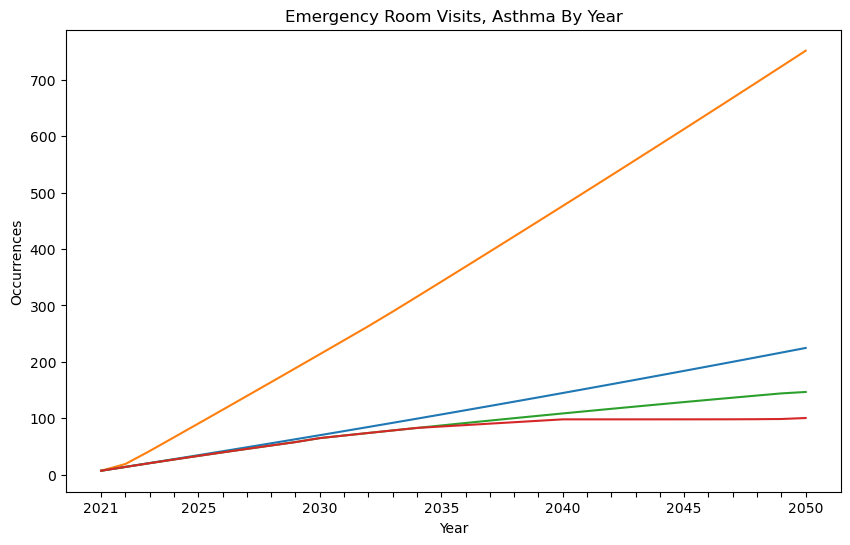

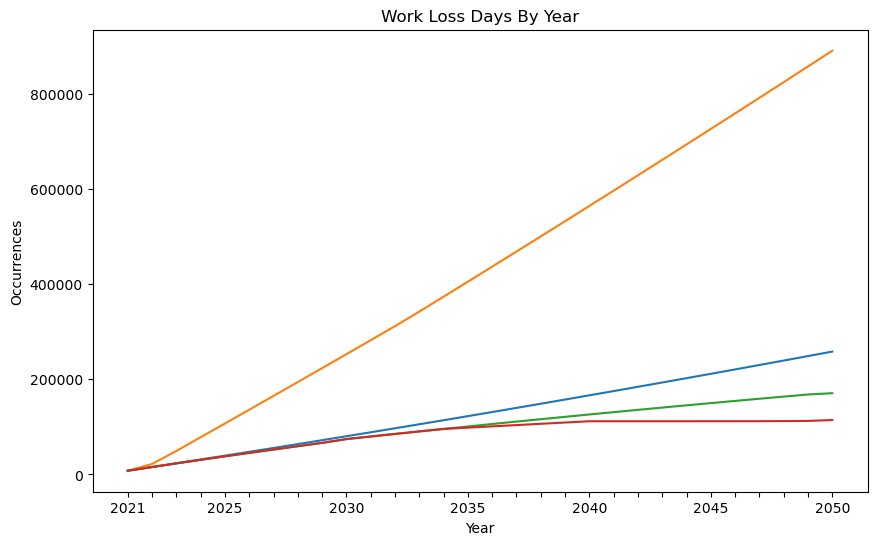

In [178]:
##############################
#
# Plot desired annual health occurances
#
##############################

N = 30
damage_names = ["Mortality","Hospital Admits, Cardiovascular (Except Heart Attacks)","Emergency Room Visits, Asthma","Work Loss Days"]
damage_indices = [3, 7, 12, 14]
counter = 0
for damage_index in damage_indices:
    # Extract the third row data from each DataFrame
    third_row_baseline = scenarioBaseline_cobra_results_df.iloc[damage_index]  # Assuming index 2 represents the third row
    third_row_scenario1 = scenario1_cobra_results_df.iloc[damage_index]
    third_row_scenario2 = scenario2_cobra_results_df.iloc[damage_index]
    third_row_scenario3 = scenario3_cobra_results_df.iloc[damage_index]

    # Plotting the third row data from each DataFrame on the same plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.plot(third_row_baseline.cumsum(), label='Baseline')
    plt.plot(third_row_scenario1.cumsum(), label='Scenario 1')
    plt.plot(third_row_scenario2.cumsum(), label='Scenario 2')
    plt.plot(third_row_scenario3.cumsum(), label='Scenario 3')

    plt.xlabel('Year')  # Customize x-axis label if needed
    plt.ylabel('Occurrences')  # Customize y-axis label if needed
    plt.title('{insertion} By Year'.format(insertion = damage_names[counter]))  # Customize plot title if needed
    
    ticks = [f'{2021 + year}' if (2021+year) % 5 == 0 or year == 0 else '' for year in range(0, N)]
    plt.xticks(range(0, N), ticks)
    
    #plt.legend()  # Show legend with DataFrame names

    #plt.grid(True)  # Add grid if needed
    plt.show()
    counter = counter+1

In [ ]:
 'Alabama'
 'Alaska'
 'Arizona'
 'Arkansas'
 'California'
 'Colorado'
 'Connecticut'
 'Delaware'
 'Florida'
 'Georgia'
 'Hawaii'
 'Idaho'
 'Illinois'
 'Indiana'
 'Iowa'
 'Kansas'
 'Kentucky'
 'Louisiana'
 'Maine'
 'Maryland'
 'Massachusetts'
 'Michigan'
 'Minnesota
 'Mississippi'
 'Missouri'
 'Montana'
 'Nebraska'
 'Nevada'
 'New Hampshire'
 'New Jersey'
 'New Mexico'
 'New York'
 'North Carolina'
 'North Dakota'
 'Ohio'
 'Oklahoma'
 'Oregon'
 'Pennsylvania'
 'Rhode Island'
 'South Carolina'
 'South Dakota'
 'Tennessee'
 'Texas'
 'Utah'
 'Vermont'
 'Virginia'
 'Washington'
 'West Virginia'
 'Wisconsin'
 'Wyoming'



In [204]:
# https://www.eia.gov/environment/emissions/state/

state_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
carbon_array = np.ones((50))
# BETTER PRACTICE WOULD BE TO USE ENUMERATE
carbon_sheet_dic = {}
for index, state in enumerate(state_list):
    path = f'C:\\Users\\\Michael B\\Desktop\\Rutgers\\BPU\\states\\{state}.xlsx'
    sheet_dic[state] = pd.read_excel(path)
    carbon_array[index] = dictionary[state].iloc[33][53]

In [233]:
#https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/

state_list = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
population_array = np.ones((50))
path = 'C:\\Users\\Michael B\\Desktop\\Rutgers\\BPU\\states\\NST-EST2022-ALLDATA.csv'
population_sheet = pd.read_csv(path)

for index in range(50):
    population_array[index] = population_sheet['POPESTIMATE2021'][14+index]
    if index > 7: # (ignore D.C.)
        population_array[index] = population_sheet['POPESTIMATE2021'][15+index]

In [365]:
def dfer(thing):
    return pd.DataFrame(thing)

def gapper():
    print('----')
    


In [235]:
pd.DataFrame([state_list, population_array, carbon_array]).T

,0,1,2
0,Alabama,5049846.00,108.39
1,Alaska,734182.00,38.87
2,Arizona,7264877.00,83.02
3,Arkansas,3028122.00,62.02
4,California,39142991.00,324.04
5,Colorado,5811297.00,85.38
6,Connecticut,3623355.00,36.57
7,Delaware,1004807.00,12.97
8,Florida,21828069.00,226.32
9,Georgia,10788029.00,124.12


In [250]:
dfer([state_list, 1000000*carbon_array/population_array]).T.sort_values(1)



,0,1
31,New York,7.86
20,Massachusetts,8.03
4,California,8.28
19,Maryland,8.51
44,Vermont,8.61
36,Oregon,9.05
46,Washington,9.53
28,New Hampshire,9.58
29,New Jersey,9.62
38,Rhode Island,9.70


In [ ]:
#dfer([state_list, 1000000*carbon_array/population_array]).T.sort_values(1)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(carbon_array)), 1000000*carbon_array/population_array, marker = 'o')
plt.grid()
plt.ylabel('Tons CO2 per Capita')
plt.xticks(range(len(carbon_array)),state_list, rotation = 'vertical')
plt.show()

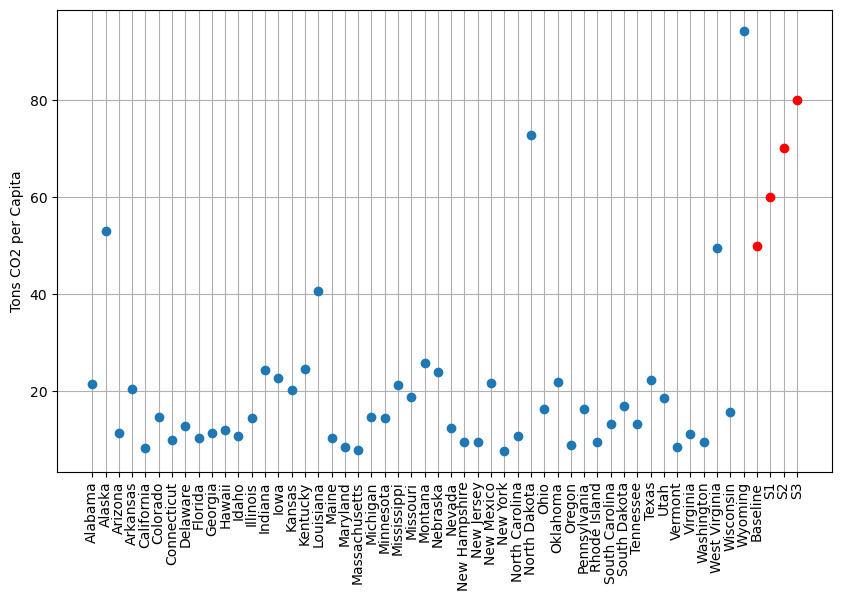

In [297]:
# Might need to delete existing NJ point if baseline is messy

scenario_list = ['Baseline', 'S1', 'S2', 'S3']
#dfer([state_list, 1000000*carbon_array/population_array]).T.sort_values(1)
plt.figure(figsize=(10, 6))
plt.plot(range(0,len(carbon_array)), 1000000*carbon_array/population_array, 'o')

plt.plot(range(len(carbon_array), len(carbon_array) + len(scenario_list)), [50, 60, 70, 80], 'o', color = 'red')
plt.grid()
plt.ylabel('Tons CO2 per Capita')

plt.xticks(range(0,len(carbon_array) + len(scenario_list)),state_list+scenario_list, rotation = 'vertical')
plt.show()

In [ ]:
carbon_array_scenario = [0,0,0,0]

#(11) Annual Emissions Limits

for n in range(N):
  sub_constraint = pulp.lpSum(pulp.lpSum(dic['e'][n][i]*x[n][k][i] for i in range(I)) + pulp.lpSum(dic['e_s2'][n][p]*y[n][k][p] for p in range(P)) for k in range(K)) <= dic['ELIM'][n]
  GEP += sub_constraint

    
    
dic['e'][n][i]*x[n][k][i] for i in range(I)) + pulp.lpSum(dic['e_s2'][n][p]*y[n][k][p] for p in range(P)) for k in range(K))
sum(dic['e'][n][i]*scenario1_x[n][k][i])
scenario1_x

In [ ]:
scenario1_CO2_totals_df['Total'].sum()
#5556522735
#overall demand = 2227997351
# get the 2021 population from that census data you pulled earlier
# Increase population by 0.7% annually
# Increase population according to projections from some other source?
nj_population_total = sum([nj_population*(1.007**n) for n in range(N)])
#nj_population = population_array[29]
#nj_population*30
carbon_array_scenario = [scenarioBaseline_CO2_totals_df['Total'].sum()/(nj_population_total), \
                         scenario1_CO2_totals_df['Total'].sum()/(nj_population_total), \
                         scenario2_CO2_totals_df['Total'].sum()/(nj_population_total), \
                         scenario3_CO2_totals_df['Total'].sum()/(nj_population_total)]
carbon_array_scenario

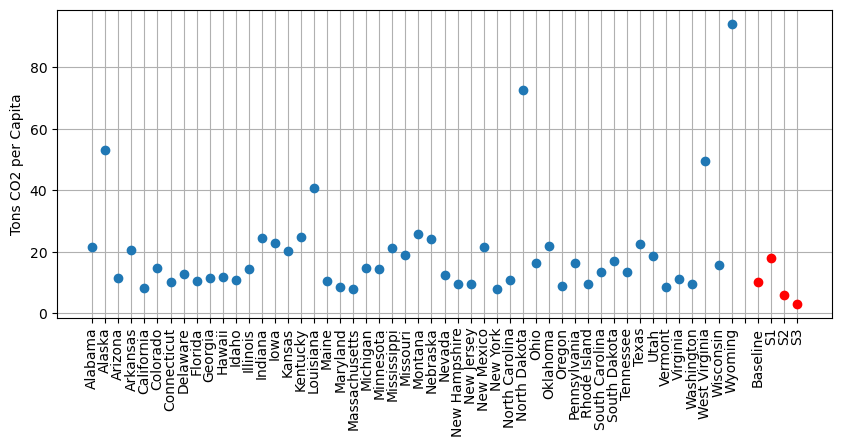

In [400]:
# Might need to delete existing NJ point if baseline is messy

scenario_list = ['Baseline', 'S1', 'S2', 'S3']
#dfer([state_list, 1000000*carbon_array/population_array]).T.sort_values(1)
plt.figure(figsize=(10, 4))
plt.plot(range(0,len(carbon_array)), 1000000*carbon_array/population_array, 'o')
plt.plot([0], [10], visible = False)
plt.plot(range(len(carbon_array)+1, len(carbon_array) + len(scenario_list)+1), carbon_array_scenario, 'o', color = 'red')
plt.grid()
plt.ylabel('Tons CO2 per Capita')

plt.xticks(range(0,len(carbon_array)+len(scenario_list)+1),state_list+['']+scenario_list, rotation = 'vertical')
plt.show()

In [355]:
sheet_name

'Sheet 30'

In [372]:
# scenario 1 mwh purchased 18752669.92 from year zero
scenario1_CO2_addition = 18752669.92*0.378

# main grid non green option is 0.378 per mwh

path = r'C:\Users\Michael B\Desktop\Rutgers\BPU\scenarios_11_26_23\scenarioBaseline\scenarioBaseline_y_variable_values.xlsx'
scenarioBaseline_y_array = np.ones(30)
scenarioBaseline_y_xls = pd.ExcelFile(path)
# Iterate through each sheet
for index, sheet_name in enumerate(scenarioBaseline_y_xls.sheet_names):
    temp_scenarioBaseline_y_df = pd.read_excel(path, sheet_name = sheet_name)
    #print(temp_scenario1_y_df)
    #print(temp_scenario1_y_df['Column 0'].sum())
    #print('')
    if index<=29:
        scenarioBaseline_y_array[index] = temp_scenarioBaseline_y_df['Column 0'].sum()

In [377]:
print(scenarioBaseline_y_array)
gapper()
scenarioBaseline_CO2_addition = scenarioBaseline_y_array.sum()*0.378
# scenario Baseline adds 235719101.32810196
scenarioBaseline_CO2_addition
scenario1_CO2_addition
# scenario 1 adds 7088509.2297600005


print(round(scenarioBaseline_CO2_addition))
print(' ', round(scenario1_CO2_addition))

[18752669.92000001 18883938.231      19016126.056      19149238.826
 19283283.42       19418266.39       19554194.22       19691073.68
 19828911.19       19967713.66       20107487.47       20248239.89
 20389977.71       20532707.46       20676436.31       20821171.554
 20966919.537      21113688.24       21261484.03       21410314.43
 21560186.56       21711107.82       21863085.72200001 22016127.129
 22170240.19       22325431.76       22481709.78       22639081.645
 22797555.203      22957138.126     ]
----
235719101
  7088509


In [382]:
scenario1_CO2_totals_df['Total'].sum()
#5556522735
#overall demand = 2227997351
# get the 2021 population from that census data you pulled earlier
# Increase population by 0.7% annually
# Increase population according to projections from some other source?
nj_population_total = sum([nj_population*(1.007**n) for n in range(N)])
#nj_population = population_array[29]
#nj_population*30
carbon_array_scenario = [(scenarioBaseline_CO2_totals_df['Total'].sum() + scenarioBaseline_CO2_addition)/(nj_population_total), \
                         (scenario1_CO2_totals_df['Total'].sum() + scenario1_CO2_addition)/(nj_population_total), \
                         scenario2_CO2_totals_df['Total'].sum()/(nj_population_total), \
                         scenario3_CO2_totals_df['Total'].sum()/(nj_population_total)]
carbon_array_scenario

[10.16184459771627, 18.0523067574827, 6.065590714421764, 3.200850209724693]

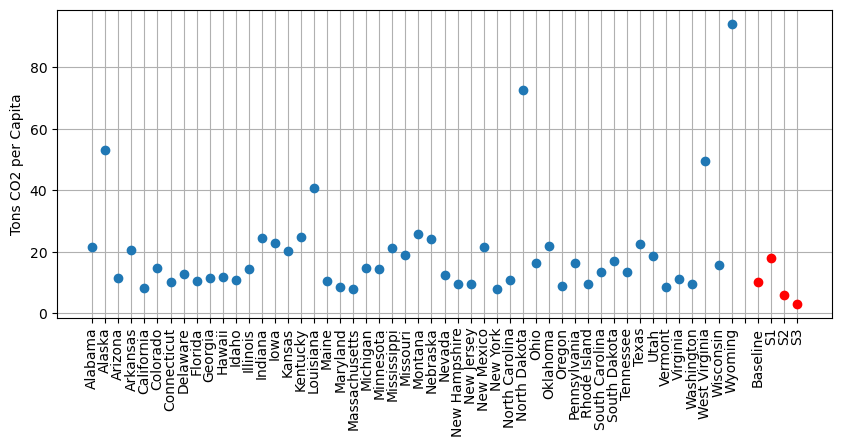

In [398]:
# Might need to delete existing NJ point if baseline is messy

scenario_list = ['Baseline', 'S1', 'S2', 'S3']
#dfer([state_list, 1000000*carbon_array/population_array]).T.sort_values(1)
plt.figure(figsize=(10, 4))
plt.plot(range(0,len(carbon_array)), 1000000*carbon_array/population_array, 'o')
plt.plot([0], [10], visible = False)
plt.plot(range(len(carbon_array)+1, len(carbon_array) + len(scenario_list)+1), carbon_array_scenario, 'o', color = 'red')
plt.grid()
plt.ylabel('Tons CO2 per Capita')

plt.xticks(range(0,len(carbon_array)+len(scenario_list)+1),state_list+['']+scenario_list, rotation = 'vertical')
plt.show()

In [396]:
carbon_array_scenario
sum(1000000*carbon_array/population_array>=max(carbon_array_scenario))

for index, state in enumerate(state_list):
    if(1000000*carbon_array[index]/population_array[index]>=20):
        print(state)

Alabama
Alaska
Arkansas
Indiana
Iowa
Kansas
Kentucky
Louisiana
Mississippi
Montana
Nebraska
New Mexico
North Dakota
Oklahoma
Texas
West Virginia
Wyoming


In [395]:
carbon_array

array([108.39210304,  38.87252609,  83.024267  ,  62.02494107,
       324.03905286,  85.38178148,  36.57325711,  12.96663357,
       226.32420667, 124.1191737 ,  17.34024797,  20.52213502,
       184.23436759, 166.38070666,  73.14235746,  59.7584346 ,
       111.29704269, 188.60044839,  14.40767432,  52.5745755 ,
        56.11814782, 147.8324608 ,  83.15839879,  63.05195843,
       116.95192717,  28.5168618 ,  47.22792917,  39.42630423,
        13.28952732,  89.11171558,  45.88899523, 156.04853443,
       115.56376861,  56.54030187, 194.03698588,  87.80347402,
        38.53819203, 213.5097227 ,  10.64210914,  69.33943185,
        15.15639296,  92.66611776, 663.45816414,  62.05360647,
         5.57240093,  97.9534027 ,  73.80107656,  88.41455315,
        92.46174389,  54.59672029])